# Computation HW #1 - Feb 11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import time
from scipy.integrate import quad
from scipy import integrate
            
from cycler import cycler
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rc('axes',prop_cycle=(cycler('color', ['#003a7d','#d83034','#98c127','#f9e858','#ff9d3a','#008dff', '#ff73b6', '#c701ff'])))

### Question 1.

In [2]:
# Estimates the integral of function f on interval [a,b]
# using the Rectangle Rule (piecewise constant) with N equal steps 
def rectangle_int(f, N, a, b):
    dx = (b-a)/N # width of rectangles
    sum = 0
    for i in range(N):
        sum += f(a+i*dx) * dx # evalute function at left end of rectangle & multiply by width to get area
    return sum


# Estimates the integral of function f on interval [a,b]
# using the Trapezoid Rule (piecewise linear) with N equal steps
def trapezoid_int(f, N, a, b):
    dx = (b-a)/N # height of trapezoids
    f_evals = [f(a+i*dx) for i in range(N)] # evaluate f at each step ahead of time - only need to do one function evaluation
    sum = 0
    for i in range(N-1):
        sum += (f_evals[i]+f_evals[i+1])/2
    return dx*sum


# Estimates the integral of function f on interval [a,b]
# using Simpson's rule with N equal steps
def simpson_int(f,N,a,b):
    
    dx = (b-a)/N # step size
    
    sum1 = 0
    for i in np.arange(1,N/2+1):
        sum1 += f(a+(2*i-1)*dx)
        
    sum2 = 0
    for i in np.arange(1,N/2):
        sum2 += f(a+2*i*dx)

    return dx/3 * (f(a) + f(b) + 4*sum1 + 2*sum2)

In [3]:
# Equation to test how well above integral estimates compare
a = 1 
b = 5
def f(x):
    return x**-1.5

# Use a range of bins
Ns = np.arange(6,1000,20)
num_evals = len(Ns)

# Store information for each integration method in 2xN array: [integral estimate using N_i bins; calculation time for N_i bins]
rec_evals = np.zeros([2,num_evals]); trap_evals = np.zeros([2,num_evals]); simp_evals = np.zeros([2,num_evals]); 

# Loop over number of bins
for i, N in enumerate(Ns):

    # Time integral calculation 
    start = timeit.default_timer()
    rec_evals[0,i] = rectangle_int(f, N, a, b)
    rec_evals[1,i] = timeit.default_timer() - start

    # Repeat for trapezoid method
    start = timeit.default_timer()
    trap_evals[0,i] = trapezoid_int(f, N, a, b)
    trap_evals[1,i] = timeit.default_timer() - start

    # Repeat for Simpson's method
    start = timeit.default_timer()
    simp_evals[0,i] = simpson_int(f, N, a, b)
    simp_evals[1,i] = timeit.default_timer() - start

In [4]:
# Calculate exact answer with scipy 
exact = quad(f, a, b)[0]

# Function which returns the relative error to the exact answer (see above)
def rel_error(vals):
    return np.abs(vals - exact)/exact

# Calculate relative error for the integration with varying number of bins
rec_error = rel_error(rec_evals[0])
trap_error = rel_error(trap_evals[0])
simp_error = rel_error(simp_evals[0])

# Print the approximate number of bins needed to converge within epsilon from exact answer 
# for each integration method
def get_N(epsilon):

    # Continue increasing number of bins until all methods converge
    rec_stop = False; trap_stop = False; simp_stop = False
    all_stop = rec_stop and trap_stop and simp_stop
    N = 2
    while(not all_stop): 
        N *= 2 # Double number of bins each loop

        # Calculate integrals
        rec_int = rectangle_int(f, N, a, b)
        trap_int = trapezoid_int(f, N, a, b)
        simp_int = simpson_int(f, N, a, b)

        # Check if each integral has converged, if so print relevant information
        if (not rec_stop and rel_error(rec_int) < epsilon):
            print('Rectangle Rule took', N, 'steps to get relative error <', epsilon)
            rec_stop = True
        if (not trap_stop and rel_error(trap_int) < epsilon):
            print('Trapezoid Rule took', N, 'steps to get relative error <', epsilon)
            trap_stop = True
        if (not simp_stop and rel_error(simp_int) < epsilon):
            print('Simpson\'s Rule took', N, 'steps to get relative error <', epsilon)
            simp_stop = True

        # Update loop condition
        all_stop = rec_stop and trap_stop and simp_stop

get_N(10**-3)
get_N(10**-5)

Simpson's Rule took 16 steps to get relative error < 0.001
Trapezoid Rule took 512 steps to get relative error < 0.001
Rectangle Rule took 2048 steps to get relative error < 0.001
Simpson's Rule took 64 steps to get relative error < 1e-05
Trapezoid Rule took 32768 steps to get relative error < 1e-05
Rectangle Rule took 262144 steps to get relative error < 1e-05


Text(0, 0.5, 'Calculation Time [s]')

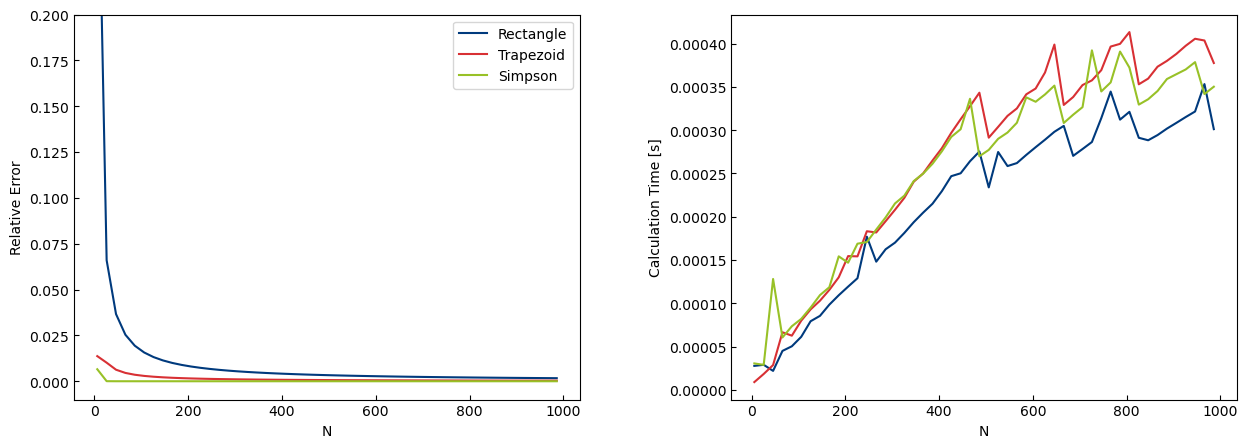

In [5]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace=0.3) 

# Plot number of bins vs. relative error
axs[0].plot(Ns, rec_error, label='Rectangle')
axs[0].plot(Ns, trap_error, label='Trapezoid')
axs[0].plot(Ns, simp_error, label='Simpson')

axs[0].set_ylim([-0.01,0.2])
axs[0].set_xlabel('N')
axs[0].set_ylabel('Relative Error')
axs[0].legend()

# Plot number of bins vs. calculation time
axs[1].plot(Ns, rec_evals[1], label='Rectangle')
axs[1].plot(Ns, trap_evals[1], label='Trapezoid')
axs[1].plot(Ns, simp_evals[1], label='Simpson')

axs[1].set_xlabel('N')
axs[1].set_ylabel('Calculation Time [s]')

Q. What did you learn about the trade-off between method, accuracy, and calculation speed?

Using a better method can be more accurate AND faster than a worse method with smaller step sizes. All three integration methods require the same time for number of bins - all are O(N). It's interesting that the calculation time is not monotonically increasing with the number of steps. The largest improvements in accuracy are gained quickly with increasing number of bins.

### Question 2.

In [3]:
# Setup for a Hernquist density profile 

nptot=10**6 # total number of particles
mtot=1e12 # total mass of halo (in M_sun)
aa=35.0 # Hernquist scale radius (in kpc)
gn=4.30071e-6 # Newton's constant, where M is in M_sun, v is in km/s, and r is in kpc:

my_randState=np.random.RandomState(seed=41295738)

In [20]:
# Generating positions by inverting M(r) -- code from class notebook on 25.1.30

randvs_r=my_randState.rand(nptot)
rvals=np.sort(1/(randvs_r**(-0.5)-1.))
rvals *= aa

In [21]:
# Distribution function for a spherical, isotropic model 
# I had some typo I couldn't figure out, code updated from Emily's implementation
def f(E): 
    qq = np.sqrt(aa/(gn*mtot)*E)
    v_g = np.sqrt(gn*mtot/aa)

    result = ((mtot/(8*np.sqrt(2)*np.pi**3*aa**3*v_g**3)) * (1/(1-qq**2)**(5/2)) * ((3*np.arcsin(qq))+((qq*(1-qq**2)**(1/2))*(1-(2*qq**2))*(
        (8*qq**4) - (8*qq**2)-3))))
    
    return result

# Potential for Hernquist profile
def phi(r):
    return gn*mtot/(r+aa)

# Function for p(E|r)
def distribution(E,r):
    return np.sqrt(phi(r)-E) * f(E)

# Bounding function, want one that works for all r
def bounding(E):
    return f(E)*np.sqrt(gn*mtot/aa - E)

/var/folders/9n/z5456p4n4k71bdvhgh74hrmr0000gq/T/ipykernel_53203/4225036943.py:15: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(energies,np.log(fE), label=str(r)+'kpc', alpha=0.75, linewidth=2)
/var/folders/9n/z5456p4n4k71bdvhgh74hrmr0000gq/T/ipykernel_53203/4225036943.py:26: RuntimeWarning: divide by zero encountered in log10
  axs[2].plot(energies, np.log10(dist), linewidth=2)
/var/folders/9n/z5456p4n4k71bdvhgh74hrmr0000gq/T/ipykernel_53203/4225036943.py:28: RuntimeWarning: divide by zero encountered in log10
  axs[2].plot(all_energies, np.log10(bounding(all_energies)), '--k', linewidth=1)


Text(0, 0.5, 'log p(E|r)')

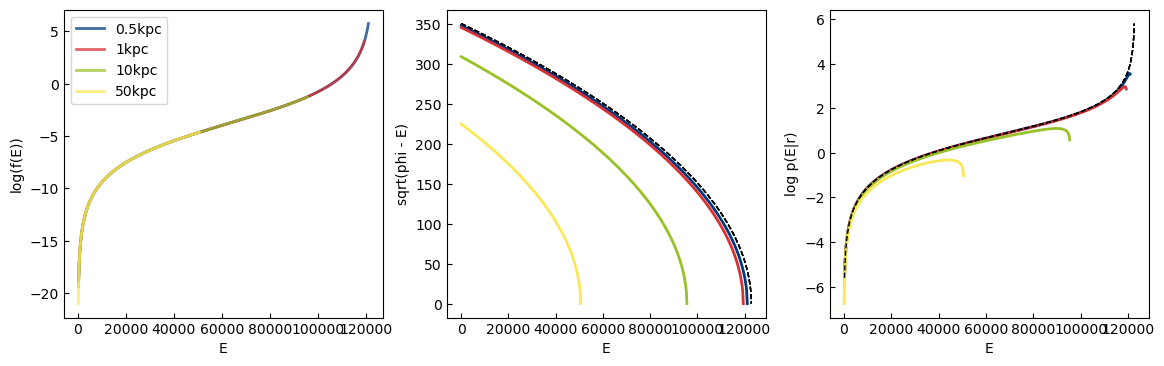

In [22]:
# Check the distribution function and test comparison function

fig, axs = plt.subplots(1,3, figsize=(14,4))
fig.subplots_adjust(wspace=0.2) 
npoints = 500

r_checks = [0.5, 1, 10,50]
all_energies = np.linspace(0,phi(0),npoints)

for r in r_checks:
    energies = np.linspace(0,phi(r),npoints)
    fE = f(energies)
    
    # Look at f(E)
    axs[0].plot(energies,np.log(fE), label=str(r)+'kpc', alpha=0.75, linewidth=2)

    # Look at sqrt(phi-E)
    sq_term = [np.sqrt(phi(r)-E) for E in energies]
    axs[1].plot(energies, sq_term, linewidth=2)
    # Suggested function to bound the sqrt term --> use r = 0 
    axs[1].plot(all_energies, np.sqrt(gn*mtot/aa-all_energies), '--k', linewidth=1)


    # Look at whole distribution function p(E|r)
    dist = [distribution(E,r) for E in energies]
    axs[2].plot(energies, np.log10(dist), linewidth=2)
    # test the bounding function
    axs[2].plot(all_energies, np.log10(bounding(all_energies)), '--k', linewidth=1)


axs[0].set_xlabel('E')
axs[0].set_ylabel('log(f(E))')
axs[0].legend()

axs[1].set_xlabel('E')
axs[1].set_ylabel('sqrt(phi - E)')

axs[2].set_xlabel('E')
axs[2].set_ylabel('log p(E|r)')

### actually sampling velocity distribution

In [24]:
time0=time.time()
velocities = np.zeros(nptot)

Emax = phi(0) # maximum possible energy
num_steps = 100000 # can reduce this to 10,000, but smaller r values aren't sampled enough
all_energies = np.linspace(0, Emax, num_steps)

# want to integrate bounding function first
bound_steps = bounding(all_energies) 
bouded_cumint = integrate.cumulative_simpson(bound_steps, x=all_energies, initial=0)

# loop over all particles
for i in range(nptot):
    while True: 
        # cuttoff bounded function at the max energy for this particle
        Emax_i = phi(rvals[i])

        max_idx = np.min(np.where(all_energies > Emax_i)) # could search this array faster with binary search
        bounded_cumint_i = bouded_cumint[0:max_idx]
    
        # first uniform deviant in area of bounding function
        A = np.random.uniform(0, bounded_cumint_i[-1]) # sample between 0 and total area under curve

        # find x_value (energy) that corresponds to indefinite integral with area A
        idx = np.argmin(np.abs(bounded_cumint_i-A))
        E_A = all_energies[np.argmin(np.abs(bounded_cumint_i-A))]

        # second uniform deviant between [0, bounded(E_A)], random y-value at this energy
        y =  np.random.uniform(0, bounding(E_A))

        # accept energy if y is under curve of p(E|r)
        if (y <= distribution(E_A, rvals[i])):
            # calculate velocity from energy
            velocities[i] = np.sqrt(2*(phi(rvals[i]) - E_A))
            break

ttot=time.time()-time0
print('total time elapsed: {0:.2f} seconds'.format(ttot))

total time elapsed: 885.66 seconds


In [26]:
# Only have magnitudes for r,v - need to get three dimensional

# Generate random numbers for phi, theta, v_phi, v_theta:
new_randvec=my_randState.rand(4, nptot)

# To store cartesian positions and velocities
pos=np.zeros((nptot, 3), dtype='float32')
vel=np.zeros((nptot, 3), dtype='float32')

# Get phi and theta for radius
phir_r=2e0*np.pi*new_randvec[0]
thetar_r=np.arccos(1e0-2e0*new_randvec[1])

# Get phi and theta for velocity
phir_v=2e0*np.pi*new_randvec[2]
thetar_v=np.arccos(1e0-2e0*new_randvec[3])

# Calculate final cartesian coordinates
pos[:,0]=rvals*np.sin(thetar_r)*np.cos(phir_r)
pos[:,1]=rvals*np.sin(thetar_r)*np.sin(phir_r)
pos[:,2]=rvals*np.cos(thetar_r)

# Calculate final cartesian velocities
vel[:,0]=velocities*np.sin(thetar_v)*np.cos(phir_v)
vel[:,1]=velocities*np.sin(thetar_v)*np.sin(phir_v)
vel[:,2]=velocities*np.cos(thetar_v)

In [30]:
# Now we need the radial velocity component

# Get unit vector r for each particle, take dot product with velocity
r_mag = np.linalg.norm(pos, axis=1)
r_hat = pos / r_mag[:,np.newaxis]
v_r = np.sum(vel * r_hat, axis=1)

# Make radial bins (logrithmically)
num_bins = 50
logr_min = np.log10(np.min(r_mag))
logr_max = np.log10(np.max(r_mag))
r_bin = np.logspace(logr_min, logr_max, num_bins)

# Assign each particle to a bin
bin_indices = np.digitize(r_mag, r_bin) - 1
v_mean = np.zeros(num_bins - 1)
bin_centers = (r_bin[:-1] + r_bin[1:]) / 2

# Get <v_r^2> for each bin
for i in range(num_bins - 1):
    in_bin = bin_indices == i
    if np.any(in_bin):
        v_mean[i] = np.mean(v_r[in_bin]**2)

    else:
        v_mean[i] = np.nan
        print('Found nan bin.')

/var/folders/9n/z5456p4n4k71bdvhgh74hrmr0000gq/T/ipykernel_53203/2918724881.py:14: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(bin_centers, np.sqrt(vr_true(bin_centers)), label='True')


Text(0, 0.5, '$<v_r^2>^{1/2} [km/s]$')

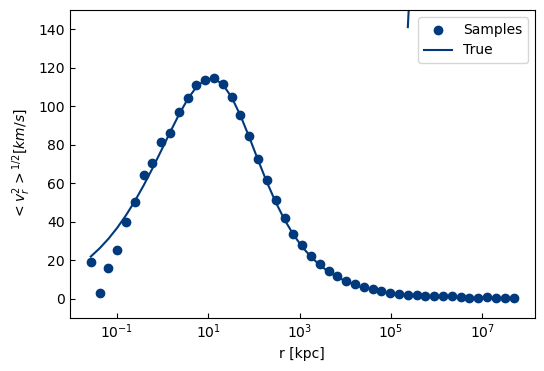

In [31]:
# Check to see if velocity dispersion is what we expect

# Equation 10 of Herquist1990, returns square of velocity dispersion
def vr_true(r):
    term1 = gn*mtot/(12*aa)
    
    term2 = 12*r*(r+aa)**3/aa**4 * np.log((r+aa)/r)

    term3 = r/(r+aa) * (25 + 52*r/aa + 42*(r/aa)**2 +12*(r/aa)**3)

    return term1*(term2-term3)

plt.scatter(bin_centers, np.sqrt(v_mean), label='Samples')
plt.plot(bin_centers, np.sqrt(vr_true(bin_centers)), label='True')

plt.ylim([-10,150])
plt.xscale('log')
plt.legend()
plt.xlabel('r [kpc]')
plt.ylabel(r'$<v_r^2>^{1/2} [km/s]$')

Q. How efficient was your code? What part was the slowest? Is it equally efficient in selecting
velocities at all radii, and why or why not?

My code is decently efficient - the slowest part is searching the large array containing the indefinite integral of my comparison function. I could use a binary search since by cumulative integral is an ordered array to increase efficiency. If I decrease the number of bins for this integration and searching, it becomes ~10times quicker but is significantly worse at selecting velocities at small radii. It is worse at electing velocities at small radii.